# Gaussian Naive Bayes Classifier from Scratch

Fit a Gaussian naive Bayes classifier on the continuous data (both z-normalization and log-
transform) from the Data Processing section. 
For the Naive Classifier:

Since there are a lot of spam and non-spam emails, you do not need to assume any prior on the class label. In other words, the class label prior $\pi_c$ can be estimated using ML and you can use $\pi_c^{ML}$ as a plug-in estimator for testing.

For this exercise, just use maximum likelihood to estimate the class conditional mean and variance of each feature and use ML estimates as a plug-in estimator for testing. 

ML: maximum likelyhood.

# Setup

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.stats import norm

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

# set up the seaborn style
sns.set()

# display 6 digit decimal float in Pandas DataFrame
pd.set_option('display.float_format', lambda x: '%.5f' % x)

__ Creating DataFrames for training dataset.__

df_Xtrain;
df_ytrain.

__ Training feature datasets to be pre-processed:__

df_Xtrain_Norm;
df_Xtrain_logTrans

In [2]:
# Creating a Panda DataFrame from csv file for Xtrain. 
df_Xtrain = pd.read_csv('spamData_Xtrain.csv',header=None)
# Creating a Panda DataFrame from csv file for ytrain.
df_ytrain = pd.read_csv('spamData_ytrain.csv',header=None)

# This DataFrame is going to be normalized. 
df_Xtrain_Norm = pd.read_csv('spamData_Xtrain.csv',header=None)
# This DataFrame is going to be log-transformed. 
df_Xtrain_logTrans = pd.read_csv('spamData_Xtrain.csv',header=None)

__ Creating DataFrames for test dataset.__

df_Xtest;
df_ytest.

__ Training feature datasets to be pre-processed:__

df_Xtest_Norm;
df_Xtest_logTrans

In [3]:
# Creating a Panda DataFrame from csv file for Xtest. 
df_Xtest = pd.read_csv('spamData_Xtest.csv',header=None)
# Creating a Panda DataFrame from csv file for ytest.
df_ytest = pd.read_csv('spamData_ytest.csv',header=None)

# This DataFrame is going to be normalized. 
df_Xtest_Norm = pd.read_csv('spamData_Xtest.csv',header=None)
# This DataFrame is going to be log-transformed. 
df_Xtest_logTrans = pd.read_csv('spamData_Xtest.csv',header=None)

___

# Implementation

## 1. Data Exploration 

In [4]:
df_Xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,...,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000
mean,0.11019,0.20197,0.29365,0.03979,0.31255,0.09778,0.11972,0.10327,0.09416,0.23745,...,0.03049,0.03407,0.14111,0.01823,0.26591,0.07643,0.04680,5.93462,55.57520,289.05905
std,0.31731,1.22255,0.52578,0.95467,0.66263,0.26659,0.41477,0.34843,0.29057,0.57170,...,0.30917,0.20155,0.27950,0.11758,0.61761,0.23152,0.37479,38.36838,226.65263,642.77909
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.59200,6.00000,36.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.06800,0.00000,0.00000,0.00000,0.00000,2.28700,15.00000,94.00000
75%,0.00000,0.00000,0.43000,0.00000,0.40000,0.00000,0.00000,0.00000,0.00000,0.16000,...,0.00000,0.00000,0.18900,0.00000,0.32400,0.05800,0.00000,3.78700,45.00000,273.00000
max,4.34000,14.28000,5.10000,42.73000,10.00000,3.57000,7.27000,4.68000,5.26000,5.26000,...,10.00000,4.36700,9.75200,4.08100,9.57500,5.30000,13.12900,1102.50000,9989.00000,15841.00000


In [5]:
df_ytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 1 columns):
0    3065 non-null int64
dtypes: int64(1)
memory usage: 24.0 KB


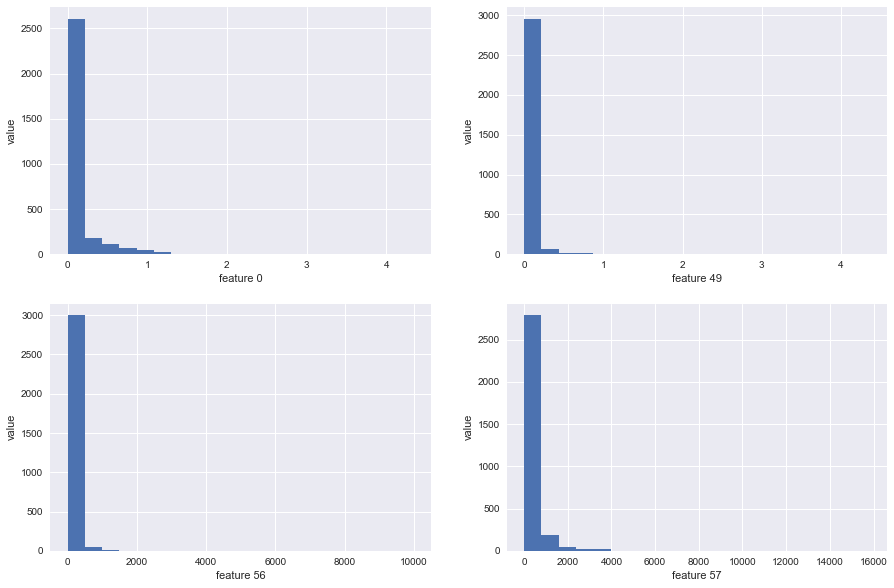

In [6]:
# set the figure size
fig=plt.figure(figsize=(15,10))
# plot histogram to explore the normalized data.
plt.subplot(221)
_ = plt.hist(df_Xtrain.iloc[:,0],bins=20)
_ = plt.xlabel('feature 0')
_ = plt.ylabel('value')

plt.subplot(222)
_ = plt.hist(df_Xtrain.iloc[:,48],bins=20)
_ = plt.xlabel('feature 49')
_ = plt.ylabel('value')

plt.subplot(223)
_ = plt.hist(df_Xtrain.iloc[:,55],bins=20)
_ = plt.xlabel('feature 56')
_ = plt.ylabel('value')

plt.subplot(224)
_ = plt.hist(df_Xtrain.iloc[:,56],bins=20)
_ = plt.xlabel('feature 57')
_ = plt.ylabel('value')
plt.show()

___

## 2. Data Processing

### 2.1 Normalization: 
Standardize each column so they have 0 mean and unit variance. 

In [7]:
def stdev(column):
    avg = np.mean(column)
    sd  = np.sum(np.square(column-avg))/(len(column)-1)
    return np.sqrt(sd)

def z_norm(column):
    column = column - np.mean(column)
    column = column/stdev(column)
    return column

In [8]:
df_Xtrain_Norm = df_Xtrain_Norm.apply(z_norm)
df_Xtest_Norm = df_Xtest_Norm.apply(z_norm)

In [9]:
df_Xtrain_Norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,...,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000
mean,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-0.34726,-0.16521,-0.55851,-0.04168,-0.47168,-0.36680,-0.28864,-0.29638,-0.32404,-0.41533,...,-0.09861,-0.16902,-0.50485,-0.15508,-0.43054,-0.33012,-0.12486,-0.12861,-0.24079,-0.44815
25%,-0.34726,-0.16521,-0.55851,-0.04168,-0.47168,-0.36680,-0.28864,-0.29638,-0.32404,-0.41533,...,-0.09861,-0.16902,-0.50485,-0.15508,-0.43054,-0.33012,-0.12486,-0.11318,-0.21873,-0.39370
50%,-0.34726,-0.16521,-0.55851,-0.04168,-0.47168,-0.36680,-0.28864,-0.29638,-0.32404,-0.41533,...,-0.09861,-0.16902,-0.26156,-0.15508,-0.43054,-0.33012,-0.12486,-0.09507,-0.17902,-0.30346
75%,-0.34726,-0.16521,0.25933,-0.04168,0.13197,-0.36680,-0.28864,-0.29638,-0.32404,-0.13547,...,-0.09861,-0.16902,0.17136,-0.15508,0.09406,-0.07959,-0.12486,-0.05597,-0.04666,-0.02498
max,13.33031,11.51534,9.14143,44.71735,14.61971,13.02453,17.23926,13.13527,17.77800,8.78533,...,32.24581,21.49806,34.38640,34.55372,15.07273,22.56256,34.90546,28.57993,43.82665,24.19485


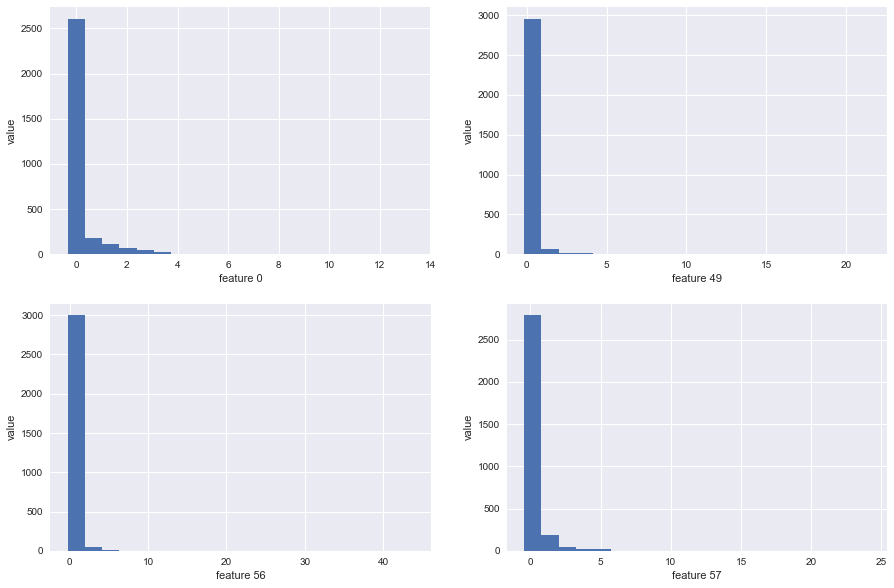

In [10]:
# set the figure size
fig=plt.figure(figsize=(15,10))
# plot histogram to explore the normalized data.
plt.subplot(221)
_ = plt.hist(df_Xtrain_Norm.iloc[:,0],bins=20)
_ = plt.xlabel('feature 0')
_ = plt.ylabel('value')

plt.subplot(222)
_ = plt.hist(df_Xtrain_Norm.iloc[:,48],bins=20)
_ = plt.xlabel('feature 49')
_ = plt.ylabel('value')

plt.subplot(223)
_ = plt.hist(df_Xtrain_Norm.iloc[:,55],bins=20)
_ = plt.xlabel('feature 56')
_ = plt.ylabel('value')

plt.subplot(224)
_ = plt.hist(df_Xtrain_Norm.iloc[:,56],bins=20)
_ = plt.xlabel('feature 57')
_ = plt.ylabel('value')
plt.show()

### 2.2 Log-transform:
Transform each feature using $\log(x_{i,j}+0.1)$ (assume natural log)

The log transformation can be used to make highly skewed distributions less skewed.

In [11]:
df_Xtrain_logTrans = np.log(df_Xtrain_logTrans+0.1)
df_Xtest_logTrans = np.log(df_Xtest_logTrans+0.1)

In [12]:
df_Xtrain_logTrans.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,...,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000,3065.00000
mean,-1.95866,-1.97169,-1.52871,-2.27945,-1.56638,-1.98105,-1.99863,-2.01451,-2.02163,-1.75490,...,-2.23567,-2.16806,-1.68240,-2.21663,-1.56725,-1.98907,-2.16278,1.01300,2.79680,4.54748
std,0.71186,0.79319,1.01377,0.27707,1.04414,0.68442,0.73689,0.69271,0.67991,0.96754,...,0.36799,0.39555,0.65527,0.29453,0.92814,0.57760,0.43817,0.75753,1.45422,1.55061
min,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,...,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,0.09531,0.09531,0.09531
25%,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,...,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,0.52591,1.80829,3.58629
50%,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,-2.30259,...,-2.30259,-2.30259,-1.78379,-2.30259,-2.30259,-2.30259,-2.30259,0.87004,2.71469,4.54436
75%,-2.30259,-2.30259,-0.63488,-2.30259,-0.69315,-2.30259,-2.30259,-2.30259,-2.30259,-1.34707,...,-2.30259,-2.30259,-1.24133,-2.30259,-0.85802,-1.84516,-2.30259,1.35764,3.80888,5.60984
max,1.49065,2.66584,1.64866,3.75724,2.31254,1.30019,1.99742,1.56444,1.67896,1.67896,...,2.31254,1.49672,2.28767,1.43055,2.26955,1.68640,2.58241,7.00543,9.20925,9.67036


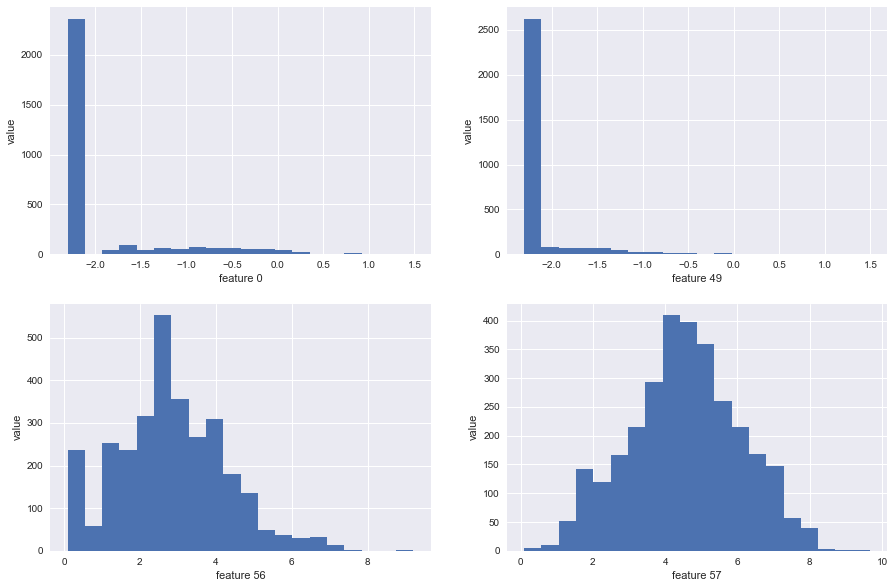

In [13]:
# set the figure size
fig=plt.figure(figsize=(15,10))
# plot histogram to explore the normalized data.
plt.subplot(221)
_ = plt.hist(df_Xtrain_logTrans.iloc[:,0],bins=20)
_ = plt.xlabel('feature 0')
_ = plt.ylabel('value')

plt.subplot(222)
_ = plt.hist(df_Xtrain_logTrans.iloc[:,48],bins=20)
_ = plt.xlabel('feature 49')
_ = plt.ylabel('value')

plt.subplot(223)
_ = plt.hist(df_Xtrain_logTrans.iloc[:,55],bins=20)
_ = plt.xlabel('feature 56')
_ = plt.ylabel('value')

plt.subplot(224)
_ = plt.hist(df_Xtrain_logTrans.iloc[:,56],bins=20)
_ = plt.xlabel('feature 57')
_ = plt.ylabel('value')
plt.show()

___

## 3. Fitting the Classifier

### 3.1 Mean, Variance Maximum Likelihood Estimate

Calculate the maximum likelihood estimate of the mean and variance of each feature for the two class "spam" and "not spam".

In [14]:
def getEstimate(column,y):
    
    """For the two class 'spam' and 'non-spam', 
    calcualte maximum lieklihood estimate of the mean and variance of each feature """
        
    # Index of sample labled as spam
    c1_index = y.iloc[:,0] == 1
    # Index of sample labeld as non-spam
    c0_index = y.iloc[:,0] == 0
    
    
    # Get mean and standard variation estimate for class 'spam'
    spam_mean = np.mean(column[c1_index])
    spam_variance = np.std(column[c1_index])
    
    # Get mean and standard variation estimate for class 'non-spam'
    non_spam_mean = np.mean(column[c0_index])
    non_spam_variance = np.std(column[c0_index]) 
    
    result = pd.DataFrame([spam_mean,spam_variance,non_spam_mean,non_spam_variance])
    
    return [spam_mean,spam_variance,non_spam_mean,non_spam_variance]

In [15]:
def convertToDataFrame(series):
    dict_new = series.to_dict()
    df_new = pd.DataFrame(dict_new)
    df_new = df_new.transpose()
    df_new.columns = ['spam_mean','spam_variance','non_spam_mean','non_spam_variance']
    return df_new

In [16]:
df_estimate_Norm = convertToDataFrame(df_Xtrain_Norm.apply(getEstimate,args=(df_ytrain,)))
df_estimate_logTrans = convertToDataFrame(df_Xtrain_logTrans.apply(getEstimate,args=(df_ytrain,)))

In [17]:
multi_table([df_estimate_Norm.head(),df_estimate_logTrans.head()])

,spam_mean,spam_variance,non_spam_mean,non_spam_variance
0,0.13392,0.94294,-0.09025,1.02661
1,-0.03322,0.26689,0.02239,1.27442
2,0.22621,0.94759,-0.15245,1.00524
3,0.06071,1.57355,-0.04091,0.02236
4,0.30395,1.08808,-0.20484,0.87823
,spam_mean,spam_variance,non_spam_mean,non_spam_variance
0,-1.78467,0.79811,-2.07592,0.62012
1,-1.77474,0.81848,-2.10441,0.74671
2,-1.15438,1.02636,-1.78099,0.92291
3,-2.24923,0.42749,-2.29982,0.06535


___

## 4. Make Prediction

Compare the probability of the two class 'spam' and 'non-spam', then make prediction.

The proabability of the two class are:

* Spam: 
$$P({y=1}\mid {x,T}) \; \propto \; (\overline{\pi}_{c=1}) \times \prod_{j=1}^D P({x_j}\mid {y=1,T})$$ 
* Non-spam: 
$$P({y=0}\mid {x,T}) \; \propto \; (\overline{\pi}_{c=0}) \times \prod_{j=1}^D P({x_j}\mid {y=0,T})$$ 

### 4.1 Get $\pi_c$
The class label prior $\pi_c$ is estimated using ML (maximum likelihood).

$$\pi_{c=1} = \frac{number\;of\;spam}{number\;of\;training\;samples}$$ 

$$\pi_{c=0} = \frac{number\;of\;non-spam}{number\;of\;training\;samples}$$


In [18]:
print('The number of spam in the ytrain is',df_ytrain.sum().values[0],'.')
print('The number of training samples is',df_ytrain.shape[0],'.')

The number of spam in the ytrain is 1234 .
The number of training samples is 3065 .


$\pi_{c=1} = \frac{1234}{3065}$ = 0.4026

$\pi_{c=0} = \frac{1831}{3065}$ = 0.5974

In [19]:
# Set the class label prior
pi_1 = 0.4026
pi_0 = 0.5974

### 4.2 Get $\ P({x_j}\mid {y=c,T})$ 

In [20]:
def getPDF(column,estimate,c):
    """Get Normal PDF of each feature for the two classes and return the log10(PDF)"""
    columnIndex = column.name
    if c == 'spam':
        mu, sigma = estimate.iloc[columnIndex,:][0:2]
        column = norm.pdf(column,loc=mu,scale=sigma)
    elif c == 'non-spam':
        mu, sigma = estimate.iloc[columnIndex,:][2:4]
        column = norm.pdf(column,loc=mu,scale=sigma)
        
    return column

* Training dataset

In [21]:
# Calculate the log(probability) for class 'spam' and 'non-spam'
# Data Preprocessing Method: Z-nomalization.
df_Xtrain_Norm_PDF_spam = df_Xtrain_Norm.apply(getPDF,args=(df_estimate_Norm,'spam',))
df_Xtrain_Norm_PDF_nonspam = df_Xtrain_Norm.apply(getPDF,args=(df_estimate_Norm,'non-spam',))

In [22]:
# Calculate the log(probability) for class 'spam' and 'non-spam'
# Data Preprocessing Method: Log-transformation.
df_Xtrain_logTrans_PDF_spam = df_Xtrain_logTrans.apply(getPDF,args=(df_estimate_logTrans,'spam',))
df_Xtrain_logTrans_PDF_nonspam = df_Xtrain_logTrans.apply(getPDF,args=(df_estimate_logTrans,'non-spam',))

* Test dataset

In [23]:
# Calculate the log(probability) for class 'spam' and 'non-spam'
# Data Preprocessing Method: Z-normalization.
df_Xtest_Norm_PDF_spam = df_Xtest_Norm.apply(getPDF,args=(df_estimate_Norm,'spam',))
df_Xtest_Norm_PDF_nonspam = df_Xtest_Norm.apply(getPDF,args=(df_estimate_Norm,'non-spam',))

In [24]:
# Calculate the log(probability) for class non-spam.
# Data Preprocessing Method: Log-transform.
df_Xtest_logTrans_PDF_spam = df_Xtest_logTrans.apply(getPDF,args=(df_estimate_logTrans,'spam',))
df_Xtest_logTrans_PDF_nonspam = df_Xtest_logTrans.apply(getPDF,args=(df_estimate_logTrans,'non-spam',))

### 4.3 Compare $P({y=1}\mid {x,T})$ and $P({y=0}\mid {x,T})$ and make prediction

$P({y=1}\mid {x,T})-P({y=0}\mid {x,T}) \; \propto \; \log(\overline{\pi}_{c=1})-\log(\overline{\pi}_{c=0}) + \sum_{j=1}^D\log(P({x_j}\mid {y=1,T}))-\sum_{j=1}^D\log(P({x_j}\mid {y=0,T}))$ 

If the result is positive then the sample is most likely a spam.

In [25]:
def pred(spam,nonspam,pi_1,pi_0):
    result = spam.apply(np.prod,axis=1)*pi_1-nonspam.apply(np.prod,axis=1)*pi_0
    df_result = pd.DataFrame(result)
    spam = df_result > 0
    nonspam = df_result <=0
    df_result[spam] = 1
    df_result[nonspam] = 0
    
    return df_result

* Training dataset

In [26]:
df_ytrain_pred_Norm = pred(df_Xtrain_Norm_PDF_spam,df_Xtrain_Norm_PDF_nonspam,pi_1,pi_0)
df_ytrain_pred_logTrans = pred(df_Xtrain_logTrans_PDF_spam,df_Xtrain_logTrans_PDF_nonspam,pi_1,pi_0)

* Test dataset

In [27]:
df_ytest_pred_Norm = pred(df_Xtest_Norm_PDF_spam,df_Xtest_Norm_PDF_nonspam,pi_1,pi_0)
df_ytest_pred_logTrans = pred(df_Xtest_logTrans_PDF_spam,df_Xtest_logTrans_PDF_nonspam,pi_1,pi_0)

___

## 5.  Calculate Error Rate

In [28]:
def getErrorRate(prediction,y):
    """Calculate the percentage of emails classified wrongly"""
    compare = prediction == y
    errorRate = 1-compare.sum().values[0]/compare.shape[0]
    return errorRate

* Traning dataset

In [29]:
Error_Rate_train_Norm = getErrorRate(df_ytrain_pred_Norm,df_ytrain)
Error_Rate_train_logTrans = getErrorRate(df_ytrain_pred_logTrans,df_ytrain)

In [30]:
print('Training dataset error rate.')
print('For z-normalized dataset:',Error_Rate_train_Norm)
print('For log-transformed dataset:',Error_Rate_train_logTrans)

Training dataset error rate.
For z-normalized dataset: 0.176508972268
For log-transformed dataset: 0.161174551387


* Test dataset

In [31]:
Error_Rate_test_Norm = getErrorRate(df_ytest_pred_Norm,df_ytest)
Error_Rate_test_logTrans = getErrorRate(df_ytest_pred_logTrans,df_ytest)

In [32]:
print('Test dataset error rate.')
print('For z-normalized dataset:',Error_Rate_test_Norm)
print('For log-transformed dataset:',Error_Rate_test_logTrans)

Test dataset error rate.
For z-normalized dataset: 0.202473958333
For log-transformed dataset: 0.184244791667


___